In [21]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
file_path = "D:\PROJECT-BENGKOD\Dataset\ObesityDataSet.csv"

In [23]:
#load dataset
df = pd.read_csv(file_path, keep_default_na=True)

#Menampilkan 5 data
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

## informasi dataset

In [24]:
#Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

## cek missing value 

In [25]:
#Menampilkan missing value
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


## visuslisasi keseimbangan pada kelas target

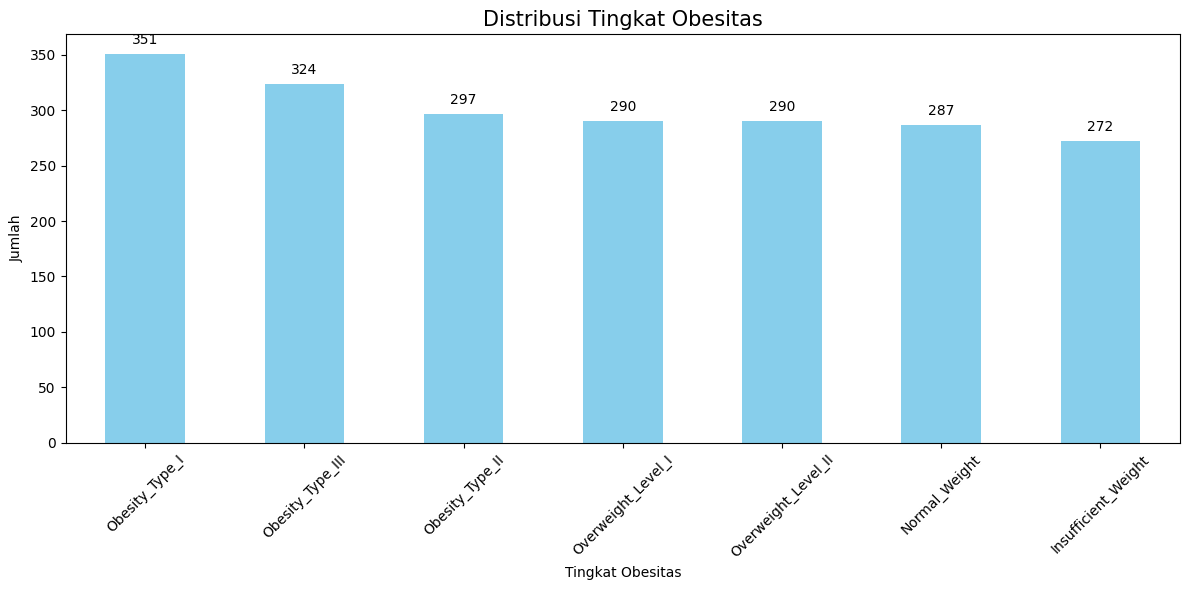

In [26]:
# Visualisasi distribusi kelas target
try:
    plt.figure(figsize=(12, 6))
    ax = df['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribusi Tingkat Obesitas', fontsize=15)
    plt.xlabel('Tingkat Obesitas')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    # Menambahkan label jumlah di atas bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error saat visualisasi distribusi kelas target: {e}")

## cek kategorikal unik

In [27]:
# cek variabel kategorikal
df.describe(include=['object'])

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [28]:
# Cek nilai unik di setiap kolom
print("\nNilai unik untuk setiap kolom:")
for column in df.columns:
    try:
        # Count unique values including NaN values
        unique_count = df[column].nunique(dropna=False)
        print(f"{column}: {unique_count} nilai unik")
        
        # Tampilkan nilai unik jika jumlahnya kurang dari 10
        if unique_count < 10:
            try:
                # Get unique values and handle NaN values for sorting
                unique_list = [x for x in df[column].unique() if pd.notna(x)]
                sorted_values = sorted(unique_list)
                
                # Check if NaN values exist and add them to display
                if df[column].isna().any():
                    print(f"  {sorted_values} + NaN values")
                else:
                    print(f"  {sorted_values}")
            except TypeError:
                # If sorting fails, display unsorted list
                print(f"  {list(df[column].unique())}")
    except Exception as e:
        print(f"Error saat cek nilai unik untuk kolom {column}: {e}")


Nilai unik untuk setiap kolom:
Age: 1395 nilai unik
Gender: 4 nilai unik
  ['?', 'Female', 'Male'] + NaN values
Height: 1563 nilai unik
Weight: 1519 nilai unik
CALC: 6 nilai unik
  ['?', 'Always', 'Frequently', 'Sometimes', 'no'] + NaN values
FAVC: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
FCVC: 809 nilai unik
NCP: 638 nilai unik
SCC: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
SMOKE: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
CH2O: 1264 nilai unik
family_history_with_overweight: 4 nilai unik
  ['?', 'no', 'yes'] + NaN values
FAF: 1187 nilai unik
TUE: 1131 nilai unik
CAEC: 6 nilai unik
  ['?', 'Always', 'Frequently', 'Sometimes', 'no'] + NaN values
MTRANS: 7 nilai unik
  ['?', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'] + NaN values
NObeyesdad: 7 nilai unik
  ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


## cek data dublikat

In [29]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 18


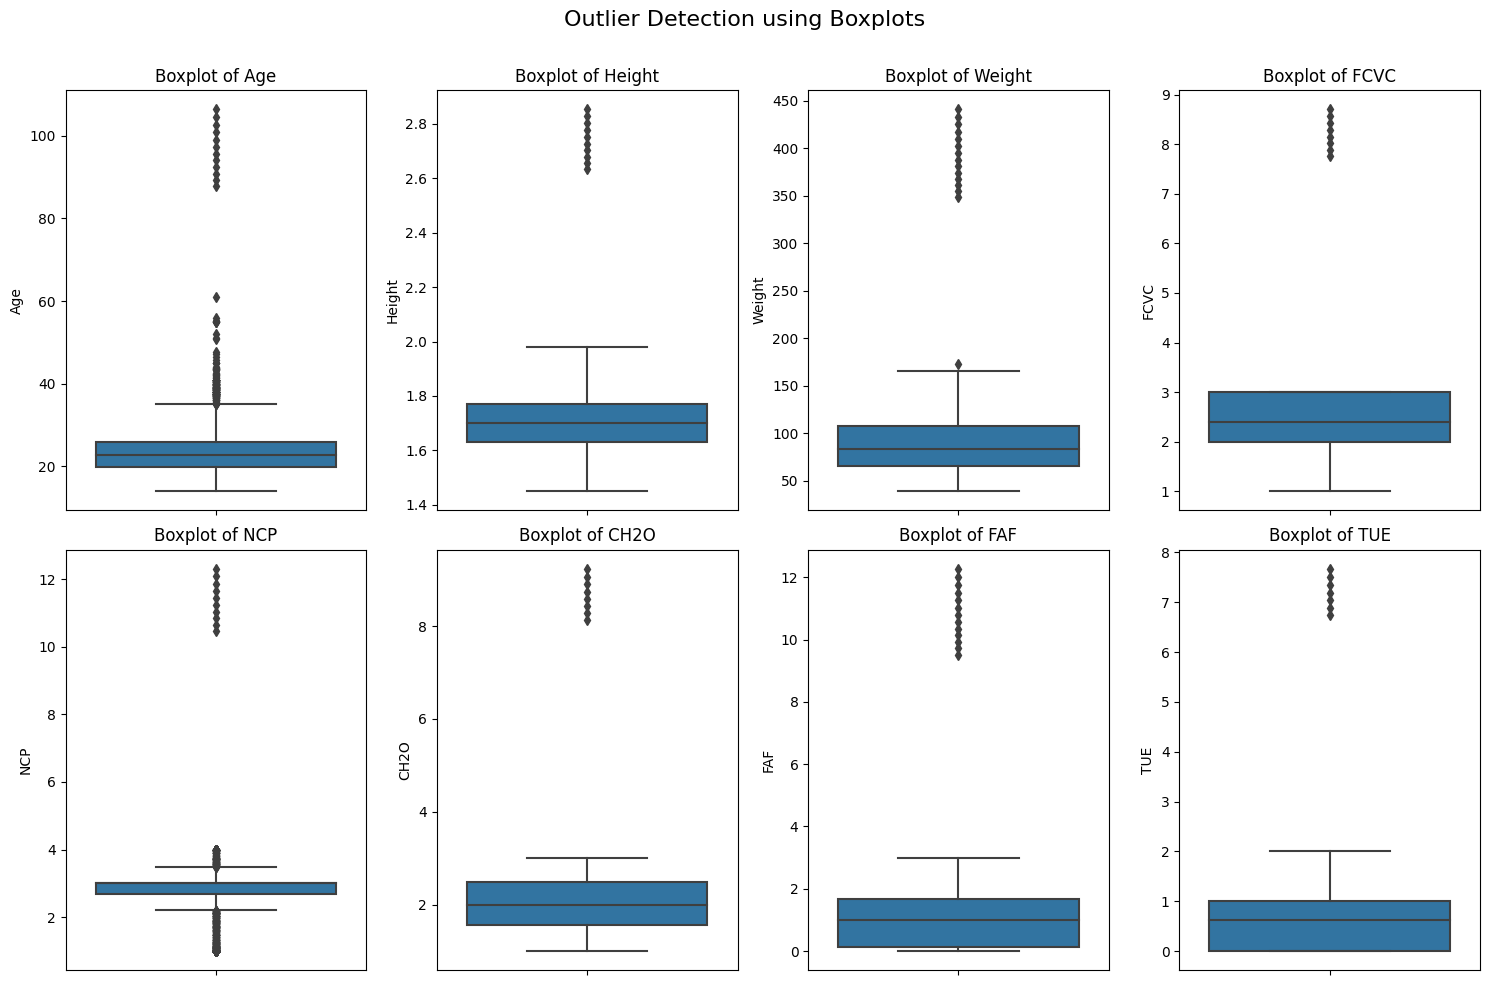

In [30]:
# Convert potential numeric columns to numeric type
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure for boxplots
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Outlier Detection using Boxplots', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# Preprocessing Data 

In [32]:
# Menangani nilai tidak konsisten pada kolom kategorikal
print("Mendeteksi dan menangani nilai tidak konsisten pada kolom kategorikal:")

# Definisikan nilai yang valid untuk setiap kolom kategorikal
valid_values = {
    'Gender': ['Male', 'Female'],
    'CALC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'FAVC': ['yes', 'no'],
    'SCC': ['yes', 'no'],
    'SMOKE': ['yes', 'no'],
    'family_history_with_overweight': ['yes', 'no'],
    'CAEC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'MTRANS': ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']
}

# Periksa dan ganti nilai tidak konsisten dengan NaN
total_replaced = 0

for col in categorical_cols:
    # Dapatkan nilai unik sebelum penggantian
    unique_vals = df[col].unique()
    
    # Identifikasi nilai yang tidak konsisten
    mask = ~df[col].isin(valid_values.get(col, []))
    
    # Hitung berapa nilai yang akan diganti
    count_replaced = mask.sum()
    
    # Ganti nilai tidak konsisten dengan NaN
    if count_replaced > 0:
        inconsistent_vals = [val for val in unique_vals if val not in valid_values.get(col, []) and pd.notna(val)]
        df.loc[mask, col] = np.nan
        print(f"  {col}: {count_replaced} nilai tidak konsisten diganti dengan NaN")
        print(f"    Nilai yang diganti: {inconsistent_vals}")
        total_replaced += count_replaced

print(f"\nTotal {total_replaced} nilai tidak konsisten telah diganti dengan NaN")

Mendeteksi dan menangani nilai tidak konsisten pada kolom kategorikal:
  Gender: 22 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  CALC: 20 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  FAVC: 22 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  SCC: 18 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  SMOKE: 13 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  family_history_with_overweight: 23 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  CAEC: 18 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []
  MTRANS: 12 nilai tidak konsisten diganti dengan NaN
    Nilai yang diganti: []

Total 148 nilai tidak konsisten telah diganti dengan NaN


In [33]:
# Tampilkan missing values setelah penggantian
print("\nMissing values setelah penggantian nilai tidak konsisten:")
print(df.isnull().sum())


Missing values setelah penggantian nilai tidak konsisten:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [34]:
# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [35]:
# Hapus duplikat
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris setelah menghapus duplikat: 2091
Jumlah baris duplikat: 0


## menangani outlier

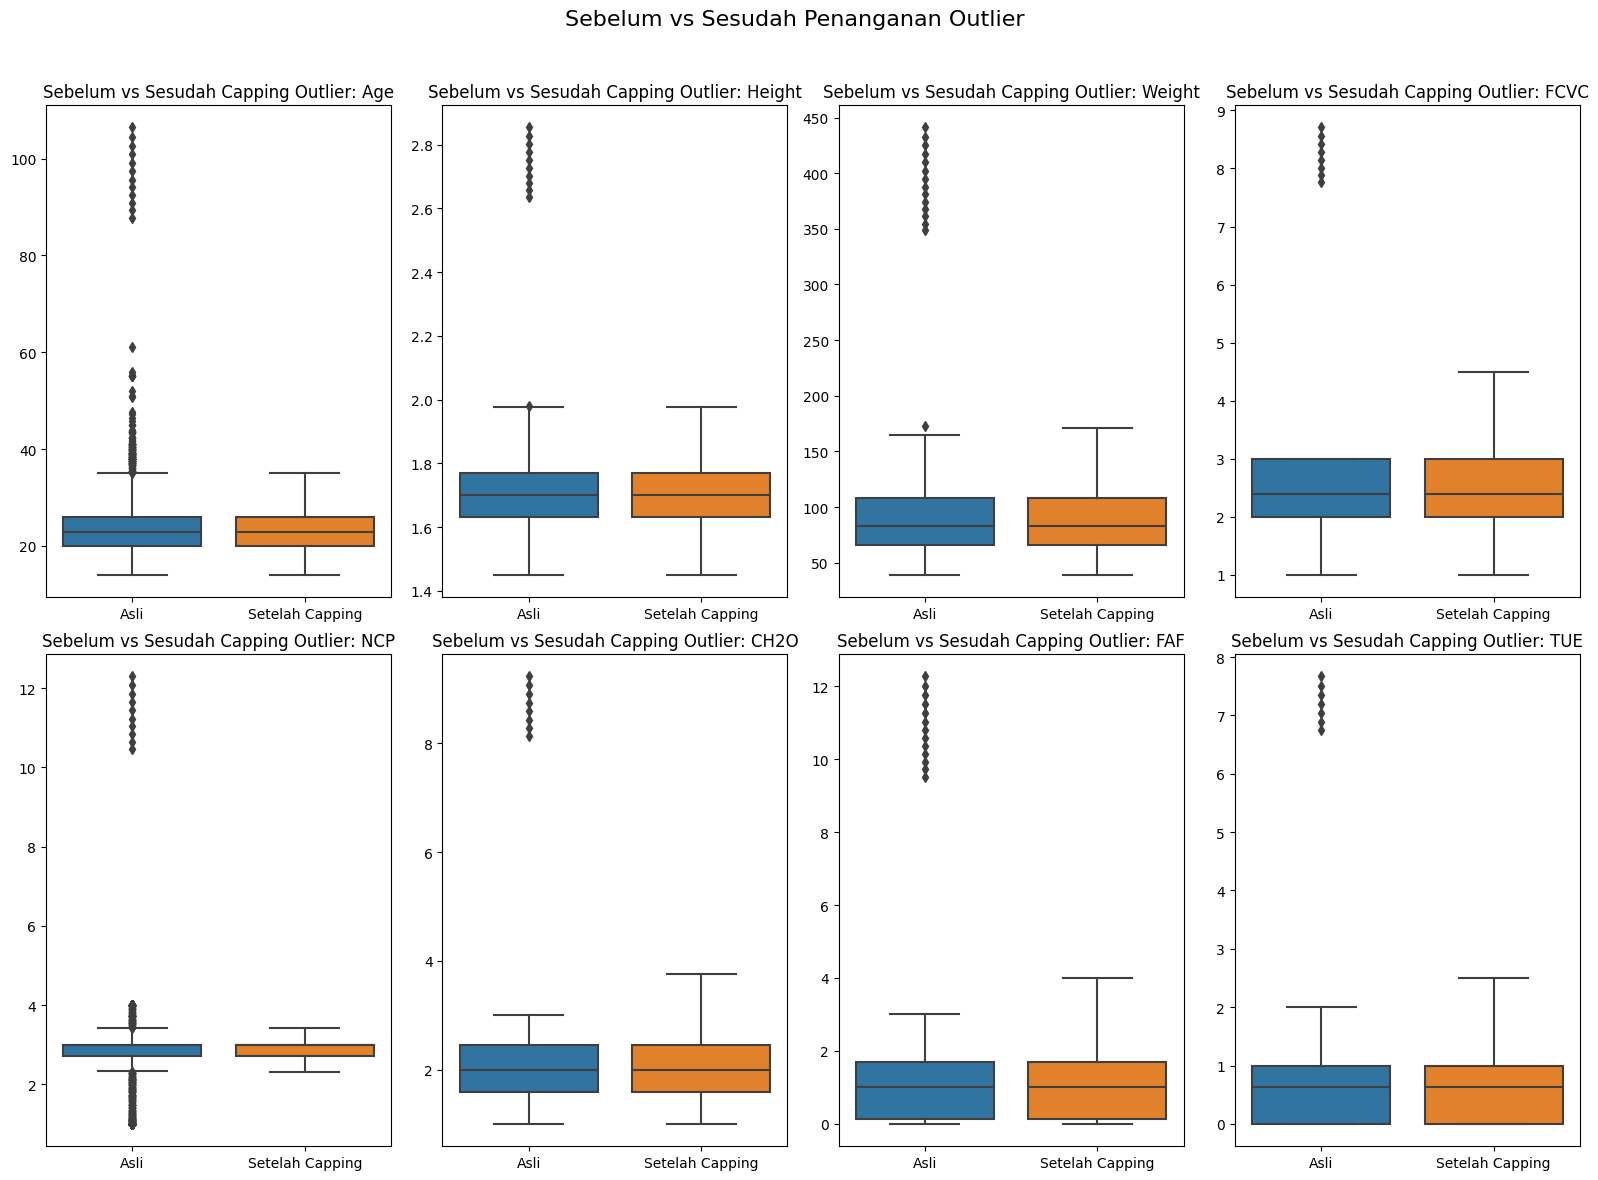


Total outlier yang ditemukan di semua kolom numerik: 840
Persentase dari total data: 0.40%


In [39]:
# Fungsi untuk menangani pencilan (outlier) dengan metode capping
def cap_outliers(df, column, lower_bound, upper_bound):
    df_copy = df.copy()
    df_copy.loc[df_copy[column] < lower_bound, column] = lower_bound
    df_copy.loc[df_copy[column] > upper_bound, column] = upper_bound
    return df_copy

# Menangani outlier dengan metode capping
df_capped = df.copy()
for column, info in outlier_info.items():
    df_capped = cap_outliers(df_capped, column, info['lower_bound'], info['upper_bound'])

# Membandingkan data sebelum dan sesudah penanganan outlier
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    
    # Boxplot berdampingan
    data_to_plot = [df[column], df_capped[column]]
    sns.boxplot(data=data_to_plot)
    plt.title(f'Sebelum vs Sesudah Capping Outlier: {column}')
    plt.xticks([0, 1], ['Asli', 'Setelah Capping'])
    
    plt.tight_layout()

plt.suptitle('Sebelum vs Sesudah Penanganan Outlier', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# Menghitung outlier yang ditangani
outliers_total = sum(info['count'] for info in outlier_info.values())
print(f"\nTotal outlier yang ditemukan di semua kolom numerik: {outliers_total}")
print(f"Persentase dari total data: {(outliers_total/len(df)):.2f}%")